In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
from baselineNet import kerasNet
import random
import math
import numpy as np
import pandas as pd
import crocoddyl
crocoddyl.switchToNumpyArray()

Using TensorFlow backend.


In [3]:
def data(nTraj:int = 1000,
         thetaVal:bool = False,
         fddp:bool = False
        ):
    model = crocoddyl.ActionModelUnicycle()
    x_data = []
    y_data = []
    
    for _ in range(nTraj):

        if thetaVal:
            initial_config = [random.uniform(-1.99, 1.99), random.uniform(-1.99, 1.99), random.uniform(0.,1.)]
        else:
            initial_config = [random.uniform(-1.99, 1.99), random.uniform(-1.99, 1.99), 0.0]
        model.costWeights = np.matrix([1, 0.3]).T
        problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 30, model)
        if fddp:
            ddp = crocoddyl.SolverFDDP(problem)
        else:
            ddp = crocoddyl.SolverDDP(problem)
            
        ddp.solve([], [], 1000)
        if ddp.iter < 1000:
            xs_ = np.array(ddp.xs)
            xs = xs_[1:, :]
            us = np.array(ddp.us)
            cost = []
            for d in ddp.datas():
                cost.append(d.cost)
            cost.pop(0)    
            cost = np.array(cost).reshape(30,1)
            state = np.hstack((xs, us, cost))
            
        y_data.append(state.ravel())   
        x_data.append(initial_config)
        
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    del model, ddp
    return x_data, y_data

In [4]:
x_data, y_data  = data(20000)

Using gpu!
X_Train :  (20000, 3)  and Y_Train:  (20000, 180)
Train on 18000 samples, validate on 2000 samples
Epoch 1/100
18000/18000 [==============================] - 2s 116us/step - loss: 0.1275 - mse: 0.1275 - rmse: 0.2887 - max_error: 4.6609 - mae: 0.1205 - val_loss: 0.0393 - val_mse: 0.0393 - val_rmse: 0.1598 - val_max_error: 3.3361 - val_mae: 0.0665
Epoch 2/100
18000/18000 [==============================] - 2s 98us/step - loss: 0.0245 - mse: 0.0245 - rmse: 0.1137 - max_error: 2.9944 - mae: 0.0524 - val_loss: 0.0140 - val_mse: 0.0140 - val_rmse: 0.0869 - val_max_error: 2.3773 - val_mae: 0.0427
Epoch 3/100
18000/18000 [==============================] - 2s 99us/step - loss: 0.0132 - mse: 0.0132 - rmse: 0.0774 - max_error: 2.3977 - mae: 0.0378 - val_loss: 0.0093 - val_mse: 0.0093 - val_rmse: 0.0671 - val_max_error: 2.0012 - val_mae: 0.0332
Epoch 4/100
18000/18000 [==============================] - 2s 106us/step - loss: 0.0100 - mse: 0.0100 - rmse: 0.0618 - max_error: 2.0713 - mae: 0

18000/18000 [==============================] - 2s 97us/step - loss: 0.0020 - mse: 0.0020 - rmse: 0.0188 - max_error: 0.7013 - mae: 0.0101 - val_loss: 4.9955e-04 - val_mse: 4.9955e-04 - val_rmse: 0.0145 - val_max_error: 0.3952 - val_mae: 0.0077
Epoch 34/100
18000/18000 [==============================] - 2s 99us/step - loss: 0.0023 - mse: 0.0023 - rmse: 0.0198 - max_error: 0.7396 - mae: 0.0104 - val_loss: 4.8296e-04 - val_mse: 4.8296e-04 - val_rmse: 0.0167 - val_max_error: 0.3819 - val_mae: 0.0090
Epoch 35/100
18000/18000 [==============================] - 2s 104us/step - loss: 0.0027 - mse: 0.0027 - rmse: 0.0197 - max_error: 0.7463 - mae: 0.0104 - val_loss: 5.8553e-04 - val_mse: 5.8553e-04 - val_rmse: 0.0190 - val_max_error: 0.4407 - val_mae: 0.0099
Epoch 36/100
18000/18000 [==============================] - 2s 98us/step - loss: 0.0019 - mse: 0.0019 - rmse: 0.0177 - max_error: 0.6415 - mae: 0.0094 - val_loss: 4.3021e-04 - val_mse: 4.3021e-04 - val_rmse: 0.0132 - val_max_error: 0.3811 - 

Epoch 65/100
18000/18000 [==============================] - 2s 101us/step - loss: 0.0013 - mse: 0.0013 - rmse: 0.0141 - max_error: 0.4941 - mae: 0.0077 - val_loss: 2.5627e-04 - val_mse: 2.5627e-04 - val_rmse: 0.0117 - val_max_error: 0.2838 - val_mae: 0.0066
Epoch 66/100
18000/18000 [==============================] - 2s 97us/step - loss: 0.0016 - mse: 0.0016 - rmse: 0.0154 - max_error: 0.5167 - mae: 0.0084 - val_loss: 4.4619e-04 - val_mse: 4.4619e-04 - val_rmse: 0.0129 - val_max_error: 0.3288 - val_mae: 0.0076
Epoch 67/100
18000/18000 [==============================] - 2s 101us/step - loss: 0.0016 - mse: 0.0016 - rmse: 0.0151 - max_error: 0.5219 - mae: 0.0083 - val_loss: 2.4855e-04 - val_mse: 2.4855e-04 - val_rmse: 0.0123 - val_max_error: 0.2585 - val_mae: 0.0070
Epoch 68/100
18000/18000 [==============================] - 2s 101us/step - loss: 0.0013 - mse: 0.0013 - rmse: 0.0140 - max_error: 0.4548 - mae: 0.0077 - val_loss: 2.2420e-04 - val_mse: 2.2420e-04 - val_rmse: 0.0108 - val_max_e

18000/18000 [==============================] - 2s 95us/step - loss: 0.0011 - mse: 0.0011 - rmse: 0.0145 - max_error: 0.4374 - mae: 0.0079 - val_loss: 2.1016e-04 - val_mse: 2.1016e-04 - val_rmse: 0.0106 - val_max_error: 0.2189 - val_mae: 0.0064
Epoch 97/100
18000/18000 [==============================] - 2s 98us/step - loss: 7.9710e-04 - mse: 7.9710e-04 - rmse: 0.0128 - max_error: 0.3605 - mae: 0.0071 - val_loss: 2.4505e-04 - val_mse: 2.4505e-04 - val_rmse: 0.0117 - val_max_error: 0.2351 - val_mae: 0.0069
Epoch 98/100
18000/18000 [==============================] - 2s 102us/step - loss: 0.0013 - mse: 0.0013 - rmse: 0.0141 - max_error: 0.4317 - mae: 0.0078 - val_loss: 1.8818e-04 - val_mse: 1.8818e-04 - val_rmse: 0.0098 - val_max_error: 0.2255 - val_mae: 0.0056
Epoch 99/100
18000/18000 [==============================] - 2s 95us/step - loss: 6.5442e-04 - mse: 6.5442e-04 - rmse: 0.0122 - max_error: 0.3363 - mae: 0.0068 - val_loss: 2.9628e-04 - val_mse: 2.9628e-04 - val_rmse: 0.0129 - val_max_

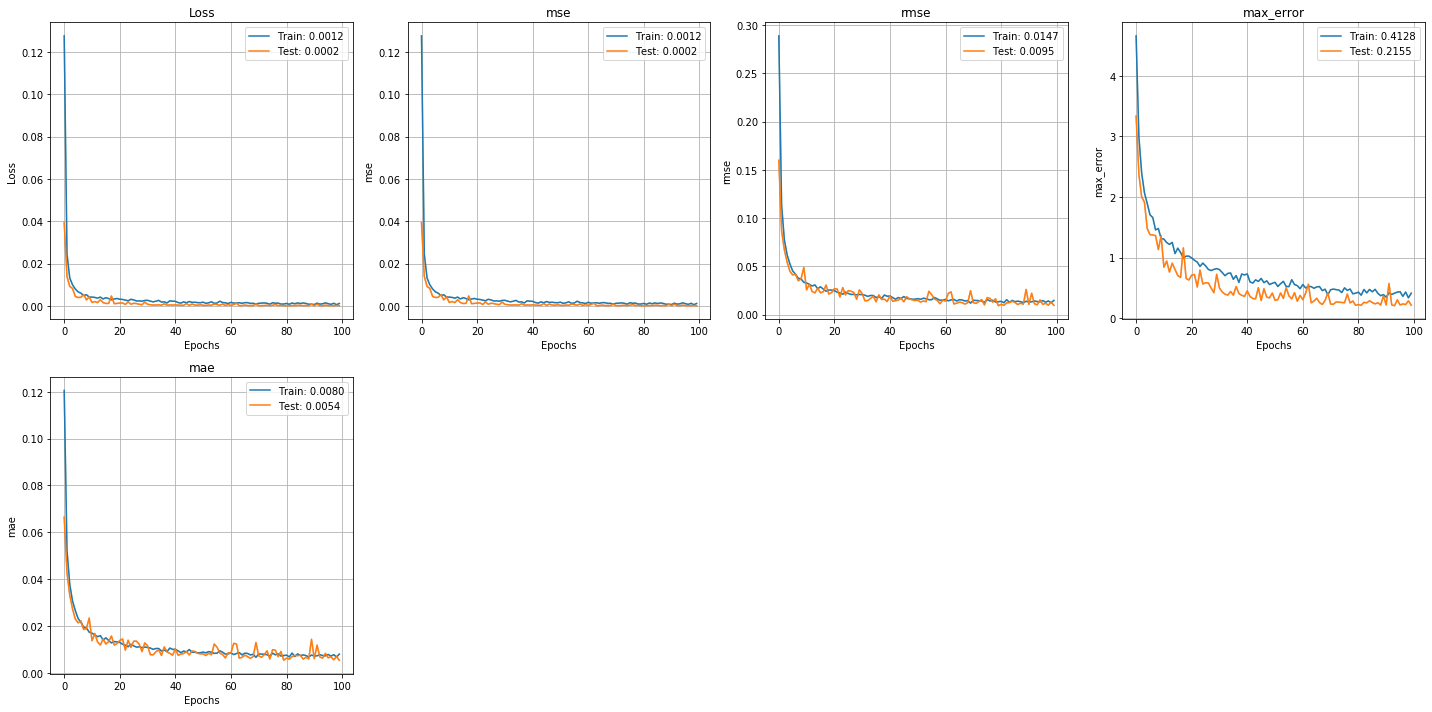

In [5]:
net = kerasNet(x_data,
             y_data,
             NUNITS_INPUT = 64,
             NUNITS = 64,
             NHIDDEN = 2,
             lr = 1e-3,
             EPOCHS = 100,
             BATCHSIZE = 32,
             validation_split = 0.1,
             VERBOSE = 1,
             optimizer = "adam",
             loss = ['mean_squared_error'],
             use_gpu = True,
             saveModel = False,
             plot_results = True,
             baseline = False)

In [6]:
## Predictions
warmstart = []
for _ in range(1000):
    # Single row -> reshape(1, -1)............single feature -> reshape(-1, 1)
    initial_config = np.array([random.uniform(-1.99, 1.99), random.uniform(-1.99, 1.99), 0.]).reshape(1, -1)
    y_prediction = net.predict(initial_config)
    
    result = np.hstack((initial_config, y_prediction))
    warmstart.append(result)
warmstart = np.squeeze(np.array(warmstart))    


In [7]:
np.savetxt("warmstart.csv", warmstart, delimiter=",")